# K-means 

Generating  500 observations from a mixture of three Gaussians on R2 with mixing weights π = [0.2, 0.5, 0.3] and given means μ and covariances Σ,

In [12]:
import numpy as np
# import pypr.clustering.gmm as gmm
mean1=[0,0]
cov=[[1,0],[0,1]]
mean2=[3,0]
mean3=[0,3]
wt=[0.2, 0.5, 0.3]
# mean=[ array([0,0]), array([3,0]), array([0,3]) ]
# cov=[diag((1,1)) , diag((1,1)), diag((1,1)) ]
# X = gmm.sample_gaussian_mixture(mean, cov, wt, samples=500)

In [13]:
x1 = np.random.multivariate_normal(mean1, cov, (100))
x2 = np.random.multivariate_normal(mean2, cov, (250))
x3 = np.random.multivariate_normal(mean3, cov, (150))
x=np.vstack((x1,x2,x3))
# x=np.concatenate((x1,x2,x3),axis=0)
x.shape

(500, 2)

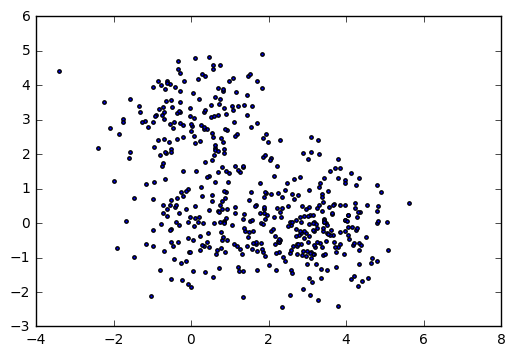

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(x[:,0],x[:,1], c='b', s=6)
plt.show()

In [15]:
def pick_mu(k):
    x_copy=x
    np.random.shuffle(x_copy)
    mu=x_copy[:k]
    return mu

In [16]:
mu=pick_mu(2)

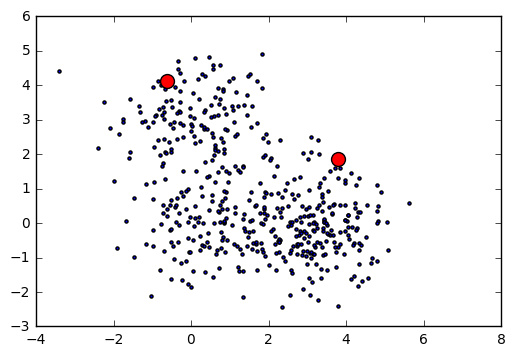

In [17]:
plt.scatter(x[:,0],x[:,1], c='b', s=5)
# centroids = initialize_centroids(points, 3)
plt.scatter(mu[:,0],mu[:,1], c='r', s=100)
plt.show()

In [18]:
def kmeans(k):
    c=np.zeros(500).astype(int)
    c=c.astype(int)
    L=[]
    mu=pick_mu(k)
    
    for t in range(20):
        

        for i in range(x.shape[0]):
            dist=[]
            for k1 in range(k):
                dist.append(np.sqrt(np.sum((x[i]-mu[k1])**2)))
            c[i]=np.argmin(dist)+1

        for k1 in range(k):
            nk=0
            for i in range(x.shape[0]):
                if c[i]==k1+1:
                    nk=nk+1
            val=np.zeros((1,2))
            for i in range(x.shape[0]):
                if c[i]==k1+1:
                    val=np.add(val,x[i])
        
            mu[k1]=val/nk
            
        sum1=0
        for i in range(x.shape[0]):
            for k1 in range(k):
                if c[i]==k1+1:
                    sum1=sum1+(np.sum((x[i]-mu[k1])**2))
        L.append(sum1)
    return L,mu,c


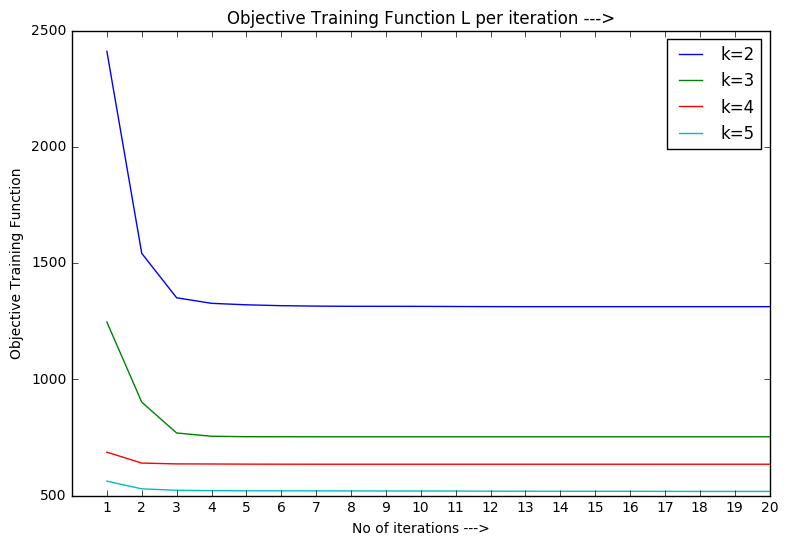

In [23]:
x_axis2 = np.arange(1, 21)
import matplotlib.pyplot as plt
plt.figure(figsize=(9,6))
l2,mu2,c2=kmeans(2)
plt.plot(x_axis2,l2,label="k=2")
l3,mu3,c3=kmeans(3)
plt.plot(x_axis2,l3,label="k=3")
l4,mu4,c4=kmeans(4)
plt.plot(x_axis2,l4,label="k=4")
l5,mu5,c5=kmeans(5)
plt.plot(x_axis2,l5,label="k=5")
plt.xticks(np.arange(min(x_axis2), max(x_axis2)+1, 1.0))
plt.legend(loc='upper right')
plt.title("Objective Training Function L per iteration --->")
plt.xlabel("No of iterations --->")
plt.ylabel("Objective Training Function")
plt.show()

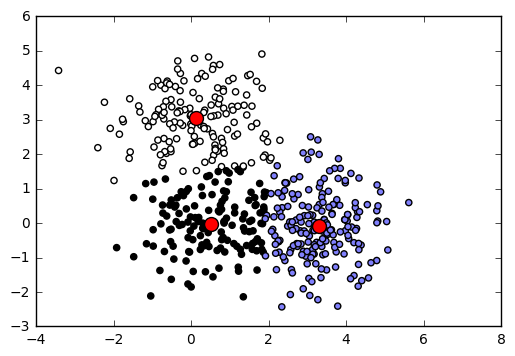

In [21]:
l3,mu3,c3=kmeans(3)
plt.scatter(x[:,0],x[:,1], c=c3 , cmap='gist_stern')
# centroids = initialize_centroids(points, 3)
plt.scatter(mu3[:,0],mu3[:,1], c='r', s=100)
plt.show()

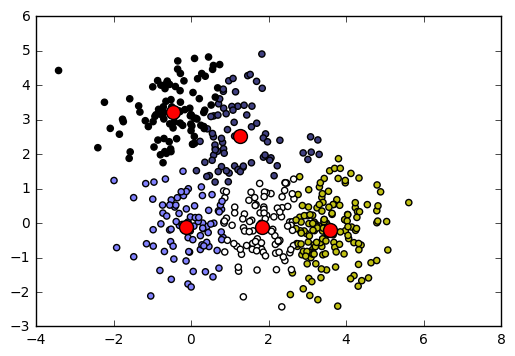

In [22]:
l5,mu5,c5=kmeans(5)
plt.scatter(x[:,0],x[:,1], c=c5 , cmap='gist_stern')
# centroids = initialize_centroids(points, 3)
plt.scatter(mu5[:,0],mu5[:,1], c='r', s=100)
plt.show()